<a id='0'></a>
# Smoke Status Classification using Bio-Signals + EDA    
**Our objective** is to build a ml model to predict the smoking status based on bio-signals

# Easy Navigation
---
- [1- Data Exploration](#1)
- [2- Explanatory Data Analysis (EDA)](#2)
    - [2.1- Categorical Features](#2-1)
        - [2.1.1- Categorical features Counts/Distributions](#2-1-1)
        - [2.1.2- Tabular Relationship](#2-1-2)
    - [2.2- Numeric Features](#2-2)
- [3- Feature Engineering](#3)
- [4- Modeling](#4)
    - [4.1- Model Construction](#4-1)
    - [4.2- Model Utilization & Submission](#4-2)

# Introduction
---
Smoking has been proven to negatively affect health in a multitude of ways.Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world’s overall health. <br><br>
According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.<br><br>
Evidence-based treatment for assistance in smoking cessation had been proposed and promoted. however, only less than one third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming, and did not routinely do so in daily practice. To overcome this problem, several factors had been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for the physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each individual smoker. Health outcome prediction models had been developed using methods of machine learning over recent years.<br><br>
A group of scientists are working on predictive models with smoking status as the prediction target. The task is to help them create a machine learning model to identify the smoking status of an individual using bio-signals.<br>

In [1]:
# import required libraies/dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')
from IPython.display import clear_output
clear_output()

<a id='1'></a>
# 1- Data Exploration

In [2]:
# load the datasets
df = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv', index_col=0)
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv', index_col=0)
df_orig = pd.read_csv('/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv')

In [3]:
# combine df and df_rig (the original dataset)
df = pd.concat([df, df_orig], ignore_index=True)
df.shape

(198240, 23)

In [4]:
df.head(5)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


<a id='2'></a>
# 2- Explanatory Data Analysis (EDA)
---
In this section, we will first go through all features one by one, and then we will see the relationships among features themselves and the target variable

In [5]:
# extract categorical and numerical features
cate_features = [
    'hearing(right)',
    'hearing(left)',
    'dental caries',
    
]
numeric_features = list(set(df.columns)  - set(cate_features))

In [6]:
## utils/functions

# funtion to draw a pie plot regarding a features counts
def draw_count_pie(df, feature):
    explode = [0]*df[feature].value_counts().shape[0]
    explode[0] = 0.1
    plt.pie(
        x = df[feature].value_counts(),
        labels=df[feature].value_counts().index,
        autopct='%1.1f%%',
        explode=explode,
        shadow=True,
        startangle=0
    )
    plt.title(f'{feature} Counts', fontdict={'fontsize': 18})
    
# draw a countplot of a categorical variable along with how it effects the target variable which is 'Smoking'
def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.countplot(df[feature], hue=df['smoking'])
    ax.set_title(f'{feature} counts vs Smoking', fontdict={'fontsize': 18})

# display tabular relationship between a numeric feature and Smoking
def display_tabular_relationship_cate_target(df, feature):
    display(pd.crosstab(
        index=df['smoking'],
        columns=df[feature],
        normalize='columns'
    ))
    
# draw distribution plot for a numeric feature
def draw_numeric_dist(df, feature):
    sns.kdeplot(df[feature]) 
    ax = sns.distplot(df[feature])
    ax.set_title(f'{feature} Distribution', fontdict={'fontsize': 18})

# draw boxen plot for a numeric feature vs Smoking
def draw_numeric_target_boxen(df, feature):
    ax = sns.boxenplot(data=df, x='smoking', y=feature)
    ax.set_title(f'{feature} VS Smoking', fontdict={'fontsize': 18})


<a id='2-1'></a>
## 2.1- Categorical Features

<a id='2-1-1'></a>
### 2.1.1- Categorical features Counts/Distributions

**IMPORTANT NOTES:**

---
In this section we will visualize how categorical features are distributed. <br>
I used Pie charts so as to help readers to conveniently identify the followings about categorical features:
- How many & which values a particular feature contains
- the most frequent value (a.k.a Mode)
- the least frequent value
- the percentage of occurance of each value


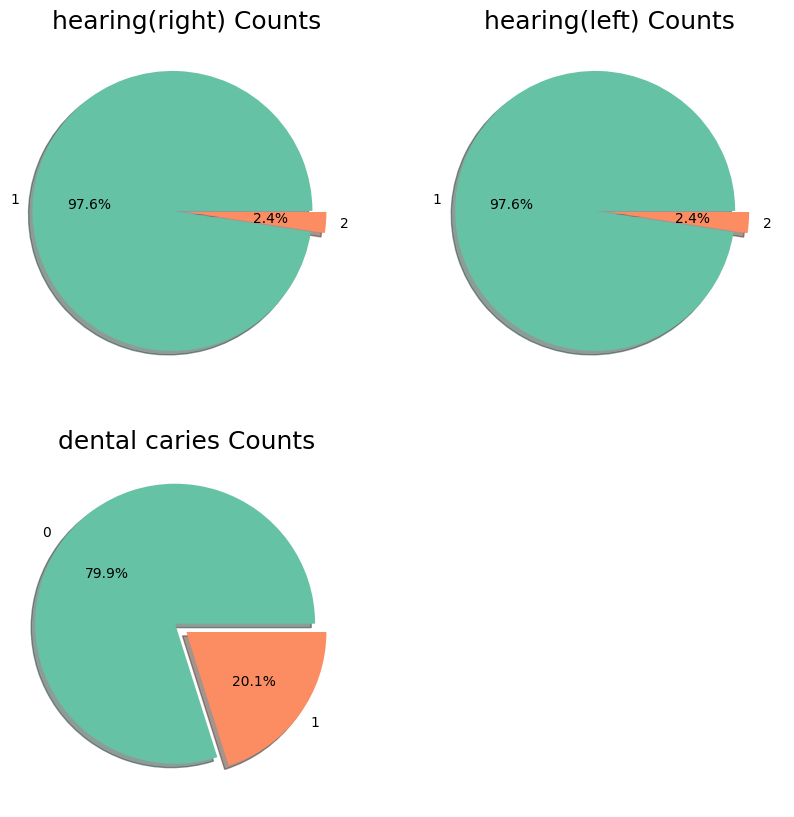

In [7]:
# draw the pie plots for all categorical features counts
plt.figure(figsize=(10, 10))
sns.set_palette('Set2')

for i, feature in enumerate(cate_features):
    plt.subplot(len(cate_features)//2+1, 2, i+1)
    draw_count_pie(df, feature)
plt.show() 

Above-displayed figures are quite self-explaining. Hence, I leave it to you to look at them and grasp how particular features are distributed.<br>

---

<a id='2-1-2'></a>
### 2.1.2- Cross Tabulation Relationships

**IMPORTANT NOTES:**<br>

---
- Using cross tabular relationships, we can easily identify how particular features have an impact on each other. In this case, we use it to determine how accurance of a particular value of a feature have effected the target variable.
- The columns in each chart bellow represent the values of a particular feature.
- The sum of each column is equal to one. Furthermore, Each chart bellow contains two rows. 
- The intersection of each column and the first row represents the percentage of occurance of the corresponding column which has NOT resulted in smoking
- The intersection of each column and the second row represents the percentage of occurance of the corresponding column which has resulted in smoking. 

In [8]:
# display the cross tabular relationships of categorical features and Smoking
print('\n\n           *************START***********             \n\n\n')
for i, feature in enumerate(cate_features):
    print(f'{i+1}: {feature} and Smoking')
    display_tabular_relationship_cate_target(df, feature)
    print(' '*10+'*'*10+'\n\n')



           *************START***********             



1: hearing(right) and Smoking


hearing(right),1,2
smoking,,
0,0.573816,0.682383
1,0.426184,0.317617


          **********


2: hearing(left) and Smoking


hearing(left),1,2
smoking,,
0,0.573677,0.686707
1,0.426323,0.313293


          **********


3: dental caries and Smoking


dental caries,0,1
smoking,,
0,0.602631,0.472362
1,0.397369,0.527638


          **********




<a id='2-2'></a>
## 2.2- Numeric features

**NOTE:**<br>

---
In this section we will visualize: 
- how each numeric feature is distributed
- how the distribution of each particular feature has an impact on the raget variable.

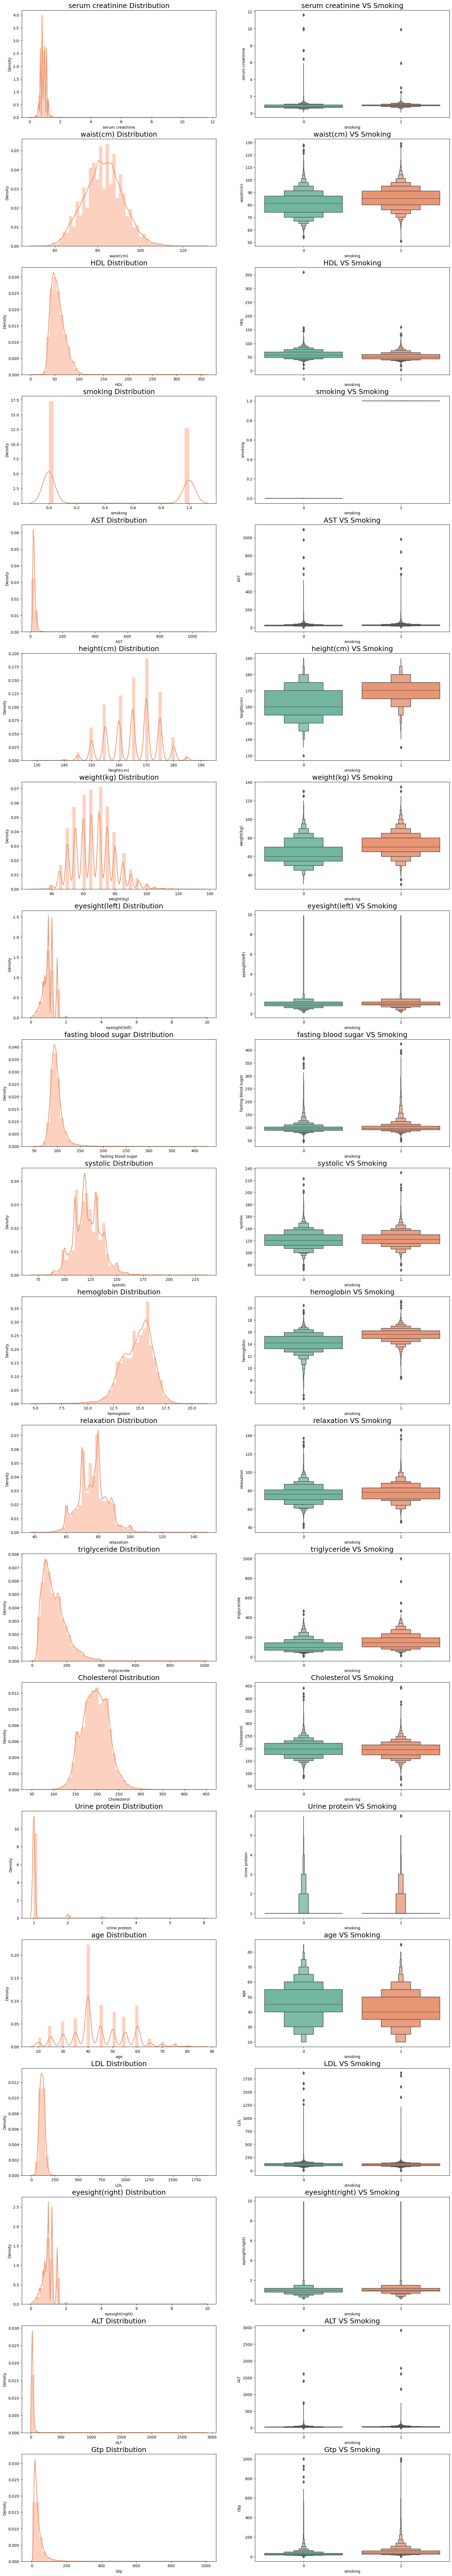

In [9]:
# draw some plots for all numeric features [+ vs Attrition]
plt.figure(figsize=(20, 120))
sns.set_palette('Set2')

i = 1
for feature in numeric_features:
    # dist
    plt.subplot(len(numeric_features), 2, i)
    draw_numeric_dist(df, feature)
    # box
    plt.subplot(len(numeric_features), 2, i+1)
    draw_numeric_target_boxen(df, feature)
    i += 2
    
plt.show()

Above-displayed figures are quite self-explaining. Hence, I leave it to you to look at them and grasp how particular features are distributed, and how they have an impact on the target variable.<br>

---

<a id='3'></a>
# 3- Feature Engineering

What is **Feature Engineering?**<br>

---
> Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. (https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)

**Creating some new features**

---
We are going to do the followings:

1. Body Mass Index (BMI): Calculate BMI using weight and height columns to assess weight status.
2. Waist to Height Ratio: Divide waist by height to get a ratio that indicates health risks.
3. Average Eyesight and Hearing: Take the average of eyesight values and hearing values to represent overall vision and auditory health.
4. Blood Pressure Category: Categorize blood pressure (systolic) into ranges like normal, prehypertension, or hypertension.
5. Cholesterol Ratio: Divide HDL by LDL to calculate a ratio that reflects cardiovascular health.
6. Liver Enzymes: Use AST, ALT, and Gtp columns to assess liver health and potential damage.

In [10]:
def do_feature_eng(dataset):
    dataset = dataset.copy()
    # Calculate BMI
    dataset['BMI'] = dataset['weight(kg)'] / ((dataset['height(cm)'] / 100) ** 2)

    # Calculate waist to height ratio
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']

    # Calculate average eyesight
    dataset['avg_eyesight'] = (dataset['eyesight(left)'] + dataset['eyesight(right)']) / 2

    # Calculate average hearing
    dataset['avg_hearing'] = (dataset['hearing(left)'] + dataset['hearing(right)']) / 2

    # Categorize blood pressure into ranges
    dataset['blood_pressure_category'] = pd.cut(dataset['systolic'], bins=[0, 120, 140, np.inf], labels=[0, 1, 2])
                                                                                                    # 0 for 'Normal', 1 for 'Prehypertension', 2 for 'Hypertension'

    # Calculate cholesterol ratio
    dataset['cholesterol_ratio'] = dataset['HDL'] / dataset['LDL']
    return dataset

In [11]:
df = do_feature_eng(df)
df_test = do_feature_eng(df_test)

---

<a id='4'></a>
# 4- Modeling

<a id='4-1'></a>
## 4.1- Model Construction

In [12]:
# separate the features and the label
X = df.drop('smoking', axis=1)
y = df['smoking']

In [13]:
# split the dataset into train and val sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.05, random_state=42)

In [14]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (188328, 28)
y_train shape: (188328,)
X_val shape: (9912, 28)
y_val shape: (9912,)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score

# Define the number of features and classes
num_features = 28

# Define the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(num_features,)))
model.add(Dropout(.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with AUC as the metric
model.compile(optimizer=tf.keras.optimizers.Adam(.001), loss='binary_focal_crossentropy', metrics=[tf.keras.metrics.AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              29696     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 256)               6

In [16]:
# see the output every 10 epochs
class AUCCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch + 1) % 10 == 0:
            # Compute AUC score on validation data
            y_pred_val = self.model.predict(X_val, verbose=0)
            y_pred_train = self.model.predict(X_train, verbose=0)
            
            auc_score_val = roc_auc_score(y_val, y_pred_val)
            auc_score_train = roc_auc_score(y_train, y_pred_train)

            print(f"Train AUC score after {epoch+1} epochs: {auc_score_train}")
            print(f"Val AUC score after {epoch+1} epochs: {auc_score_val}")
            print()

            
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a callback to save the best weights
save_best_callback = ModelCheckpoint(
    'best_weights.h5',  
    monitor='val_auc',
    save_best_only=True,
    mode='max',
    verbose=0
)

from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    if epoch < 32:
        return 0.001  # initial learning rate for epochs 0 to 31
    elif epoch < 64:
        return 0.0001  # adjusted learning rate for epoch 32 onwards
    else:
        return 0.00001  # adjusted learning rate for epoch 64 onwards

# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [17]:
# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=120, callbacks=[save_best_callback, lr_scheduler], validation_data=(X_val, y_val),verbose=2)

Epoch 1/120
2943/2943 - 30s - loss: 0.1370 - auc: 0.7933 - val_loss: 0.1306 - val_auc: 0.8185 - lr: 0.0010 - 30s/epoch - 10ms/step
Epoch 2/120
2943/2943 - 19s - loss: 0.1304 - auc: 0.8151 - val_loss: 0.1292 - val_auc: 0.8276 - lr: 0.0010 - 19s/epoch - 7ms/step
Epoch 3/120
2943/2943 - 19s - loss: 0.1280 - auc: 0.8227 - val_loss: 0.1271 - val_auc: 0.8271 - lr: 0.0010 - 19s/epoch - 6ms/step
Epoch 4/120
2943/2943 - 19s - loss: 0.1272 - auc: 0.8253 - val_loss: 0.1251 - val_auc: 0.8341 - lr: 0.0010 - 19s/epoch - 6ms/step
Epoch 5/120
2943/2943 - 19s - loss: 0.1260 - auc: 0.8285 - val_loss: 0.1253 - val_auc: 0.8335 - lr: 0.0010 - 19s/epoch - 6ms/step
Epoch 6/120
2943/2943 - 19s - loss: 0.1256 - auc: 0.8295 - val_loss: 0.1262 - val_auc: 0.8362 - lr: 0.0010 - 19s/epoch - 6ms/step
Epoch 7/120
2943/2943 - 19s - loss: 0.1261 - auc: 0.8287 - val_loss: 0.1298 - val_auc: 0.8382 - lr: 0.0010 - 19s/epoch - 6ms/step
Epoch 8/120
2943/2943 - 19s - loss: 0.1265 - auc: 0.8271 - val_loss: 0.1253 - val_auc: 0.

<a id='4-2'></a>
## 4.2- Prediction & Submission

In [18]:
# load best model
model = tf.keras.models.load_model('best_weights.h5')

In [19]:
# make predictions on the test set
y_pred = model.predict(df_test)

3318/3318 [==============================] - 6s 2ms/step


In [20]:
# load the submission file
sub_file = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')
sub_file.head()

,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5


In [21]:
sub_file['smoking'] = y_pred
sub_file.head()

,id,smoking
0,159256,0.548631
1,159257,0.356079
2,159258,0.499711
3,159259,0.180343
4,159260,0.538786


In [22]:
# write the submission file
sub_file.to_csv('submission.csv', index=False)

# Thank you :)
By: [Hikmatullah Mohammadi](https://www.kaggle.com/hikmatullahmohammadi) <br>

[Go to top](#0)